In [2]:
import os 
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

In [3]:
#Segmetacion clientes
df= pd.read_csv("Mall_Customers.csv")


In [4]:
x=np.array(df.iloc[:,3:])

In [5]:
!pip install scikit-learn==1.2.2

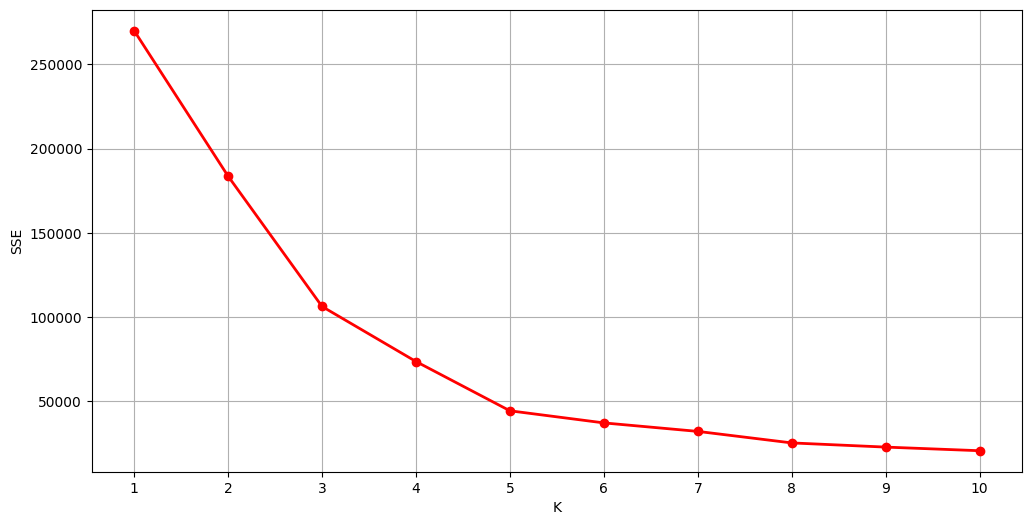

In [6]:
sse=[]
for k in range(1,11):
    kmeans= KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),sse,linewidth=2,color="red",marker="o")
plt.xlabel("K")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSE")
plt.show()


    

## 6 K

In [7]:
kmeans= KMeans(n_clusters=6,n_init="auto").fit(x)

centroids=kmeans.cluster_centers_
print('centroids', centroids)

centroids [[ 78.03571429  81.89285714]
 [ 88.2         17.11428571]
 [ 26.30434783  20.91304348]
 [108.18181818  82.72727273]
 [ 25.72727273  79.36363636]
 [ 55.2962963   49.51851852]]


labels [2 4 2 4 2 4 2 4 2 4]
['blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange']


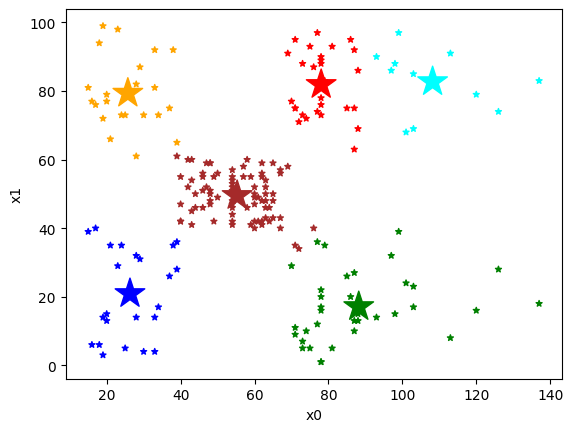

In [8]:
labels= kmeans.predict(x)
print('labels',labels[0:10])

colores= ['red','green','blue','cyan','orange',"brown"]
asignar=[]
for l in labels:
    asignar.append(colores[l])
print(asignar[0:10])

fig= plt.figure()
plt.scatter(x[:,0],x[:,1],marker='*',c=asignar,s=20)
plt.scatter(centroids[:,0],centroids[:,1],marker='*',c=colores,s=500)
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

## 5 K

centroids [[55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]
labels [4 3 4 3 4 3 4 3 4 3]
['orange', 'cyan', 'orange', 'cyan', 'orange', 'cyan', 'orange', 'cyan', 'orange', 'cyan']


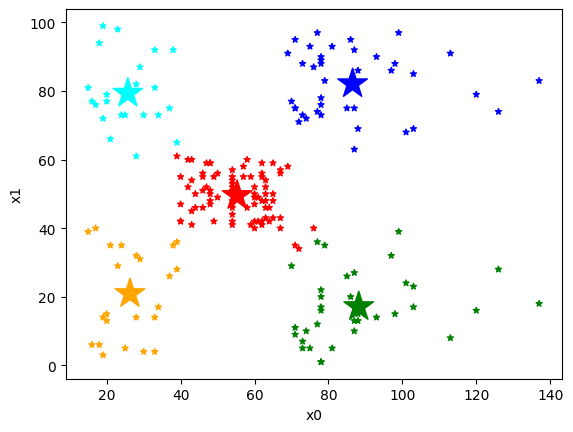

In [9]:
kmeans= KMeans(n_clusters=5,n_init="auto").fit(x)

centroids=kmeans.cluster_centers_
print('centroids', centroids)
labels= kmeans.predict(x)
print('labels',labels[0:10])

colores= ['red','green','blue','cyan','orange']
asignar=[]
for l in labels:
    asignar.append(colores[l])
print(asignar[0:10])

fig= plt.figure()
plt.scatter(x[:,0],x[:,1],marker='*',c=asignar,s=20)
plt.scatter(centroids[:,0],centroids[:,1],marker='*',c=colores,s=500)
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [10]:
# Hierarchical clustering DENDROGRAMA

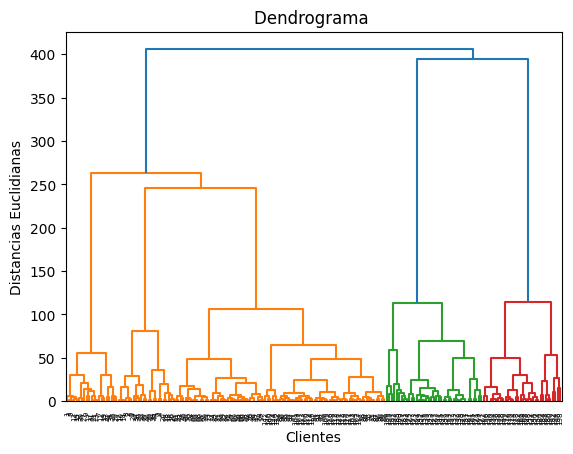

In [11]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(x,method='ward'))

plt.title('Dendrograma ')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()


In [12]:
from sklearn.cluster import AgglomerativeClustering 
hc= AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
labels=hc.fit_predict(x)

In [13]:
from sklearn.cluster import BisectingKMeans

In [14]:
bkmeans= BisectingKMeans(n_clusters=5, n_init=10)
bkmeans.fit(x)
clusters=bkmeans.predict(x)

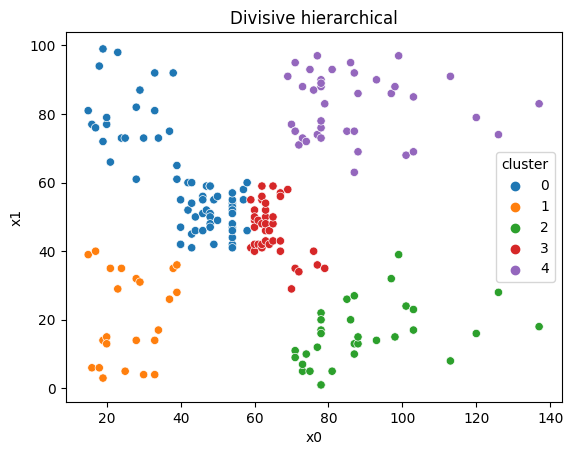

In [15]:
import seaborn as sns
data= {'x1':x[:,0], 
       'x2':x[:,1],
       'cluster':clusters}
df=pd.DataFrame(data)

plt.figure()
sns.scatterplot(data=df,x='x1',y='x2', hue='cluster',palette='tab10',legend= 'full')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title(fr'Divisive hierarchical')
plt.show()

In [16]:
from sklearn.neighbors import NearestNeighbors

In [17]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

In [18]:
avg_distances = np.mean(distances, axis=1)
print("avg_destances", avg_distances)
distances_ordered = np.sort(avg_distances)

avg_destances [ 4.82400708  3.72335881  3.57622461  2.3843298   4.31037937  2.20478298
  3.05833637  6.13513714  3.43236842  3.66754375  2.72267122  6.21065612
  2.86911783  2.29056942  2.67358086  2.67869416  3.93191989  5.50064654
  4.55956744  5.54703341  3.52069063  2.93896844  4.62366066  3.02069063
  4.94261542  4.68551069  3.06129136  7.82675629  3.53547328  4.67831158
  4.57426464  3.75        5.26556444  5.60078106  4.54056942  4.88030615
  4.83932864  3.91695226  5.32944835  4.52419093  3.94134782  6.84466903
  3.39493466  2.82134582  4.47487373  4.05851903  3.03824844  3.18216423
  1.85122959  1.85122959  2.16751159  2.31532429  2.14015582  2.31155281
  2.04551062  2.58113883  2.16751159  1.85355339  1.41257038  1.76612378
  1.83113883  1.79056942  1.26612378  1.29056942  1.10355339  1.15138782
  1.30901699  1.30901699  1.15138782  1.51612378  1.89412281  3.77475488
  1.82514077  2.15632903  1.25        1.          1.          1.5
  1.          1.75        1.5         1.25  

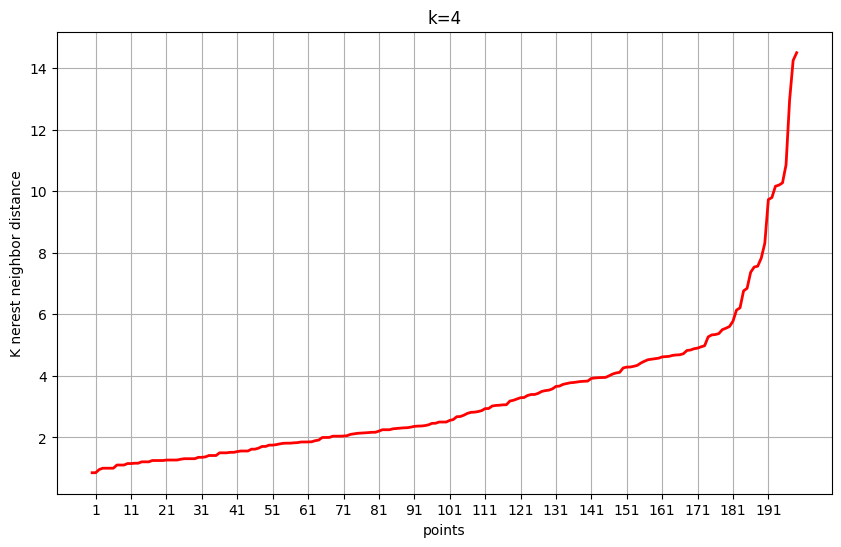

In [19]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(distances_ordered, linewidth = 2, color = 'red')
plt.xticks(np.arange(1, len(distances_ordered), 10))
plt.ylabel("K nerest neighbor distance")
plt.xlabel("points")
plt.title("k=4")
plt.show()

In [20]:
from sklearn.cluster import DBSCAN

epsilon = 6
minsamp = 4
model_db = DBSCAN(eps = epsilon, min_samples = minsamp)
model_db.fit(x)

clusters = model_db.labels_
clusters

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1, -1,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  5,  3,  5,  3,  4,  3,  4,  3,  5,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  5,  3,  4,  3,  5,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  5,  3,  4,  3, -1, -1,  6,  3, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1,  6,  7, -1,  7,  6,  7, -1, -1, -1,
       -1, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

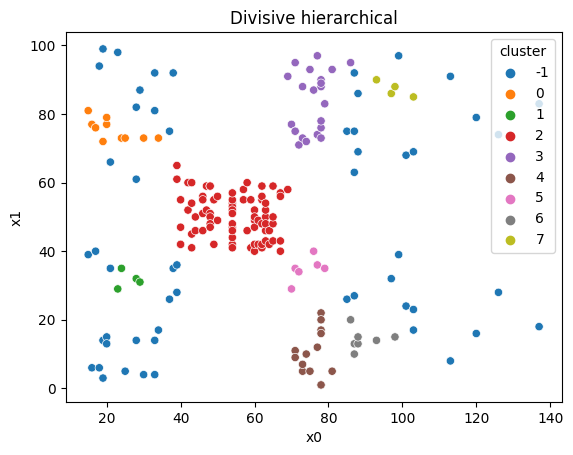

In [21]:
data1 = {'x1' : x[:, 0], 'x2' : x[:, 1], 'cluster' : clusters}
df1 = pd.DataFrame(data1)

plt.figure()
sns.scatterplot(data = df1, x='x1',y='x2', hue='cluster',palette='tab10',legend= 'full')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title(fr'Divisive hierarchical')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score
silhouette_score(x, clusters, metric = 'euclidean')

0.15101290315797036

In [25]:
points_eps = 10
paints_sample = 9
silscore = np.zeros((points_eps, paints_sample))
epsilon = np.linspace(5, 14, points_eps)
samples = np.linspace(2, 10, paints_sample)
for i in range(0, points_eps):
    for j in range(0, paints_sample):
        model_db = DBSCAN(eps = epsilon[i], min_samples = int(samples[j]))
        model_db.fit(x)
        silscore[i, j] = silhouette_score(x, model_db.labels_, metric = 'euclidean')

maxindex = np.unravel_index(silscore.argmax(), silscore.shape)
print("maxindex", maxindex)
print('epsilon', epsilon[maxindex[0]], 'min_samples', samples[maxindex[1]])
print(np.max(silscore))

maxindex (4, 1)
epsilon 9.0 min_samples 3.0
0.475053701963407


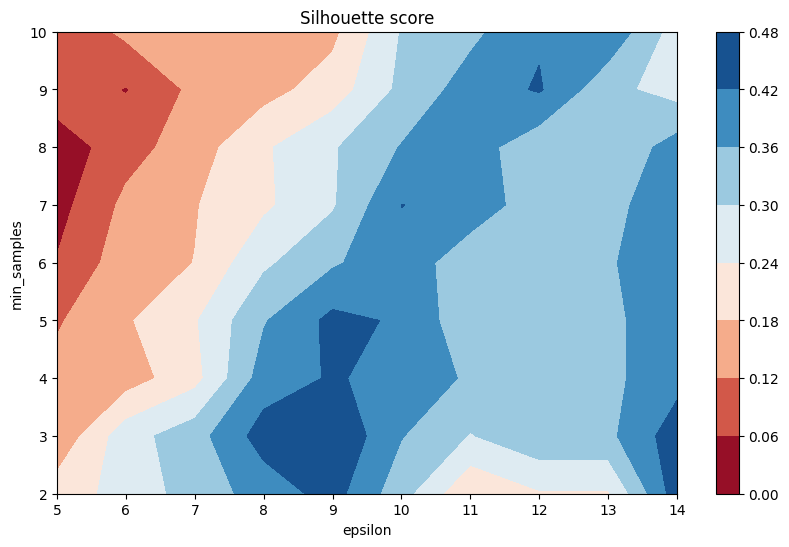

In [30]:
epsilon_mesh, samples_mesh = np.meshgrid(epsilon, samples)
plt.figure(figsize=(10,6))
contour = plt.contourf(epsilon_mesh, samples_mesh, silscore.T, cmap = 'RdBu')
plt.colorbar(contour)
plt.xlabel('epsilon')
plt.ylabel('min_samples')
plt.title('Silhouette score')
plt.show()

In [37]:
epsilon = 9
minsamp = 3
model_db = DBSCAN(eps = epsilon, min_samples = minsamp)
model_db.fit(x)

clusters = model_db.labels_
clusters

array([ 0,  1,  2,  1,  0,  1,  2,  3,  2,  1,  2,  3,  2,  1,  2,  1,  0,
        1,  0,  3,  0,  1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  1,  2,  1,
        2,  1,  2,  1,  4,  1,  4,  1,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  4,  5,  4,  5,  6,  5,  6,  5,  4,  5,  6,  5,
        6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,
        5,  6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,  5,  6,  5,
        6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6, -1,  6,
       -1,  6,  5,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

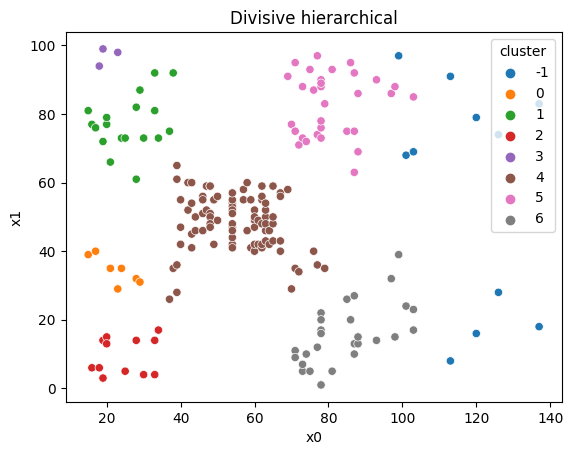

In [38]:
data1 = {'x1' : x[:, 0], 'x2' : x[:, 1], 'cluster' : clusters}
df1 = pd.DataFrame(data1)

plt.figure()
sns.scatterplot(data = df1, x='x1',y='x2', hue='cluster',palette='tab10',legend= 'full')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title(fr'Divisive hierarchical')
plt.show()


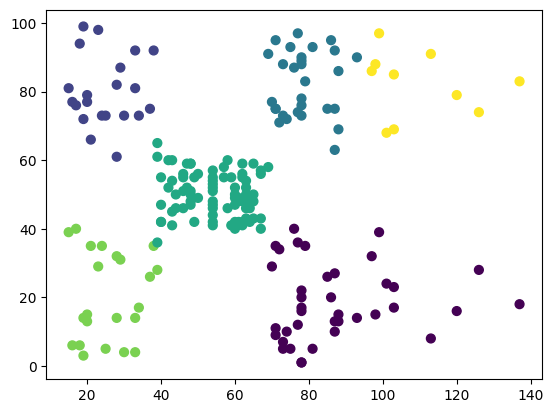

In [45]:
#Gaussian mixture models
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='spherical').fit(x)
labels = gmm.predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis');



In [47]:
n_components = np.arange(1, 8)
model_gmm = [GaussianMixture(n, covariance_type='full', random_state=0).fit(x) for n in n_components]
model_gmm

[GaussianMixture(random_state=0),
 GaussianMixture(n_components=2, random_state=0),
 GaussianMixture(n_components=3, random_state=0),
 GaussianMixture(n_components=4, random_state=0),
 GaussianMixture(n_components=5, random_state=0),
 GaussianMixture(n_components=6, random_state=0),
 GaussianMixture(n_components=7, random_state=0)]

In [50]:
gmm = model_gmm[-2]
labels_gmm = gmm.predict(x)
labels_gmm

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 0, 5, 1, 5, 0, 5, 0, 5,
       1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 1, 5, 0, 5, 1, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

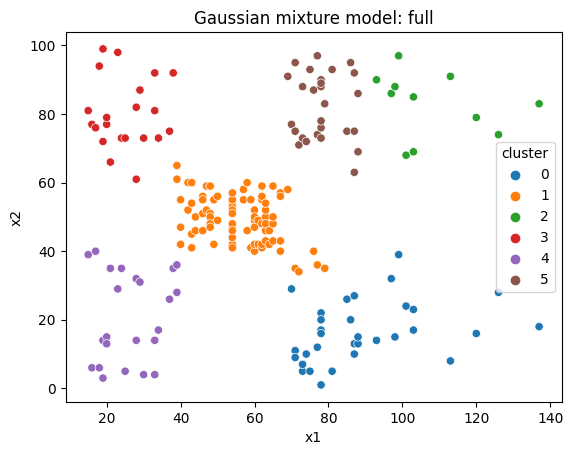

In [53]:
data2 = {'x1' : x[:, 0], 'x2' : x[:, 1], 'cluster' : labels_gmm}
df2 = pd.DataFrame(data2)

plt.figure()
sns.scatterplot(data = df2, x = 'x1', y = 'x2', hue = 'cluster', palette = 'tab10', legend = 'full')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(fr'Gaussian mixture model: full')
plt.show()